In [68]:
import numpy as np
import pandas as pd
import os
import datetime
import seaborn as sns

In [2]:
f = open('../path_to_data.txt', "r")
path_to_dataset = os.path.join(f.readline().rstrip("\n"))
f.close() 

In [3]:
mydir = os.path.join(path_to_dataset, 'real_rain_gauge_data', 'csv_formatado/')
filename_list = os.listdir(mydir)
print(len(filename_list))

609


In [4]:
locs = pd.read_pickle(os.path.join('../reference/','rain_gauge_locs.pckl'))

In [5]:
def extractLonLat(filename):
    lonlat = filename.split("W")[1][:-4].split("_S")
    lon = -float(lonlat[0])
    lat = -float(lonlat[1])
    return(lon, lat)

In [56]:
regions = []
for filename in filename_list:
    lon, lat = extractLonLat(filename)
    
    ind = int(str(locs.loc[np.stack([locs['lon'] == lon, locs['lat'] == lat]).all(axis=0)].index[0]))
    regions.append((lon, lat, ind,filename[:2]))

In [57]:
regions.sort()

In [58]:
df = pd.DataFrame(regions, columns=['lon', 'lat', 'location', 'state'])

In [59]:
df = df.set_index('location')

In [60]:
hej = df.state.unique()
hej.sort()
hej

array(['AC', 'AL', 'AM', 'AP', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MG',
       'MS', 'MT', 'PA', 'PB', 'PE', 'PI', 'PR', 'RJ', 'RN', 'RO', 'RR',
       'RS', 'SC', 'SE', 'SP', 'TO'], dtype=object)

In [61]:
states_regions = {'AC': 'N', 'AL': 'NE', 'AP': 'N', 'AM': 'N', 'BA': 'NE', 'CE':'NE', 'DF':'CW', 'ES':'SE' , 'GO': 'CW', 'MA':'NE', 'MT':'CW', 'MS':'CW', 'MG':'SE', 'PA':'N', 'PB':'NE', 'PR':'S', 'PE': 'NE', 'PI':'NE', 'RJ':'SE', 'RN':'NE', 'RS':'S', 'RO':'N', 'RR':'N', 'SC':'S', 'SP':'SE', 'SE':'NE', 'TO':'N'  }

In [62]:
df['region'] = [states_regions[df.state.values[i]] for i in range(len(df))]

In [63]:
df

,lon,lat,state,region
location,,,,
79,-72.786667,-8.950000,AC,N
211,-72.747778,-8.266944,AC,N
202,-72.405000,-7.610556,AC,N
139,-71.617500,-4.530000,AM,N
155,-70.575278,-8.241944,AC,N
...,...,...,...,...
403,-35.200000,-5.900000,RN,NE
49,-35.134722,-6.560833,PB,NE
530,-34.959444,-8.059167,PE,NE


<AxesSubplot:xlabel='lon', ylabel='lat'>

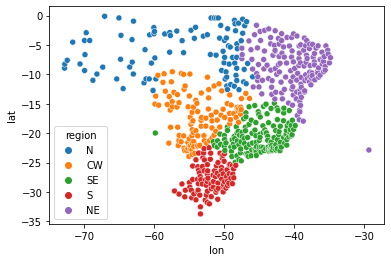

In [69]:
sns.scatterplot(x=df.lon, y=df.lat, hue=df.region)

<AxesSubplot:xlabel='lon', ylabel='lat'>

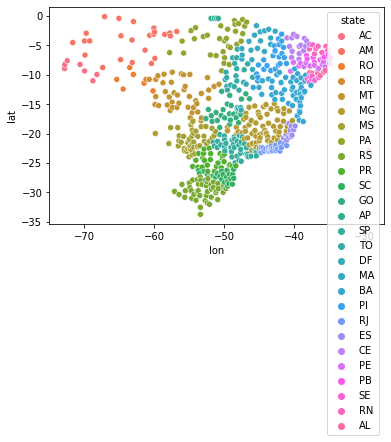

In [83]:
sns.scatterplot(x=df.lon, y=df.lat, hue=df.state)

In [73]:
df[df.region=='SE'].state.unique()

array(['MG', 'SP', 'RJ', 'ES'], dtype=object)

In [82]:
df[(df.lat<-19)&(df.lon<-59)]

,lon,lat,state,region
location,,,,
85,-59.823889,-19.98,MG,SE


In [89]:
df.loc[df.index==85, 'region'] = 'CW'

<AxesSubplot:xlabel='lon', ylabel='lat'>

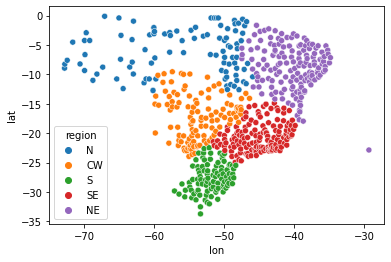

In [92]:
sns.scatterplot(x=df.lon, y=df.lat, hue=df.region)

In [93]:
df.to_pickle(os.path.join(path_to_dataset, 'real_rain_gauge_data', 'regions.pckl'))

https://en.wikipedia.org/wiki/Federative_units_of_Brazil 
https://www.brazil.org.za/tocantins.html